In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
inp0=pd.read_csv("googleplaystore.csv")

In [8]:
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
inp0.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [10]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
inp0.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [12]:
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
inp0.dropna(how= 'any', inplace=True)

In [14]:
inp0.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [15]:
inp0.Price.value_counts()[:5]

Price
0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: count, dtype: int64

In [16]:
inp0['Price'] = inp0.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

In [17]:
inp0.Reviews =inp0.Reviews.astype('int32')

In [18]:
inp0.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [19]:
inp0.Installs.value_counts()

Installs
1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: count, dtype: int64

In [20]:
def clean_installs(val):
    return int (val.replace(",","").replace("+",""))

In [21]:
inp0.Installs =inp0.Installs.map(clean_installs)

In [22]:
inp0.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

# Handling App size

In [23]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' ==size[-1:]:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

In [24]:
inp0["Size"] = inp0["Size"].map(change_size)

In [25]:
inp0.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [26]:
 #filling size which had NA
inp0.Size.fillna(method='ffill', inplace = True)    


In [27]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Rating Value Check 0-5

In [28]:
inp0.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [29]:
#checking reviews > Installs
len(inp0[inp0.Reviews>inp0.Installs])

7

In [30]:
inp0[inp0.Reviews>inp0.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [31]:
inp0 = inp0[inp0.Reviews <=inp0.Installs].copy()

In [32]:
inp0.shape

(9353, 13)

In [33]:
len(inp0[(inp0.Type == "Free") & (inp0.Price>0)])

0

# Box Plot for price

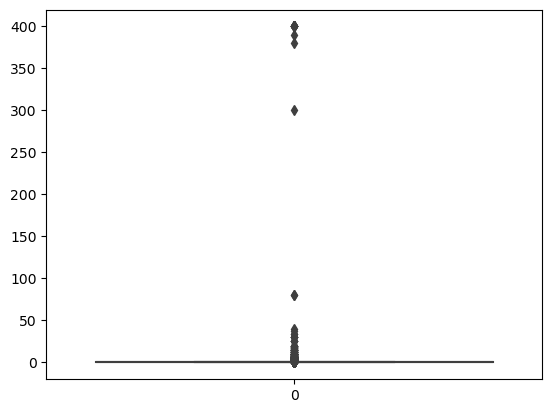

In [34]:
sns.boxplot(inp0.Price)
plt.show()

# Box Plot for Reviews

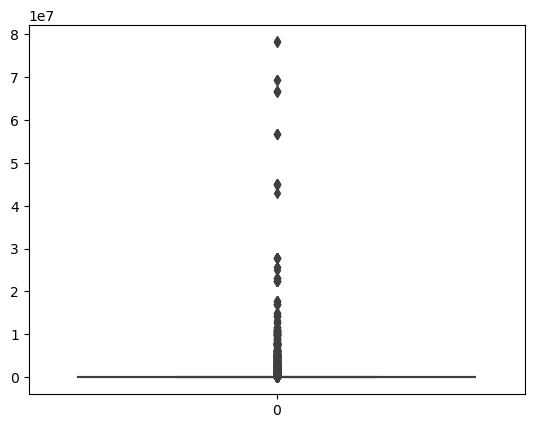

In [35]:
sns.boxplot(inp0.Reviews)
plt.show()

# Hostogram for Rating

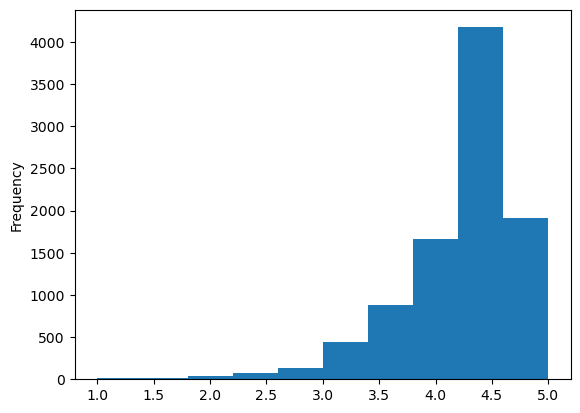

In [36]:
inp0.Rating.plot.hist()
plt.show()

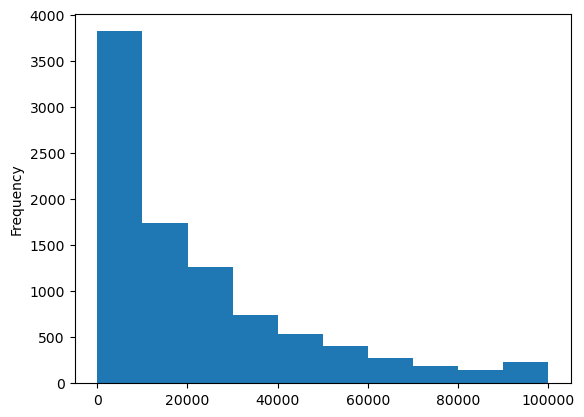

In [37]:
inp0['Size'].plot.hist()
plt.show()

# price check

In [38]:
len(inp0[inp0.Price>200])

15

In [39]:
inp0[inp0.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [40]:
inp0 = inp0[inp0.Price <=200].copy()
inp0.shape

(9338, 13)

In [41]:
#more than 2 million reviews

inp0 = inp0[inp0.Reviews <= 2000000]
inp0.shape

(8885, 13)

In [42]:
#high install values

inp0.Installs.quantile([0.1, 0.25,0.5,0.70,0.9,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [43]:
len(inp0[inp0.Installs >= 1000000000])

6

In [44]:
inp0 = inp0[inp0.Installs < 1000000000].copy()
inp0.shape

(8879, 13)

# Variate Analysis

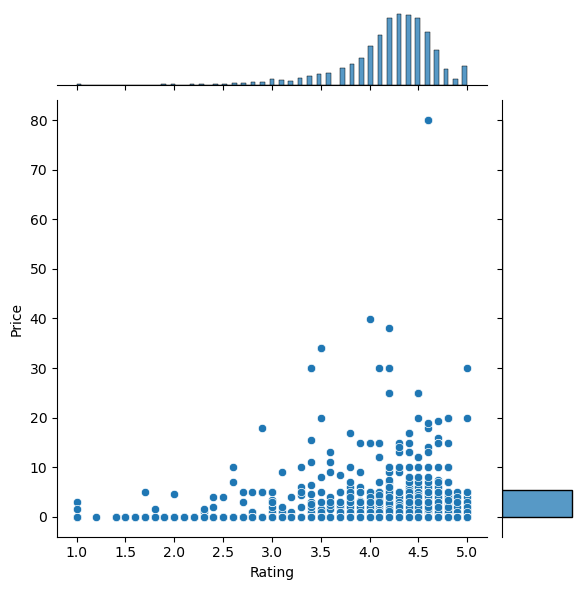

In [45]:
#scatter plot for Rating Vs price

sns.jointplot(x='Rating', y='Price', data=inp0)

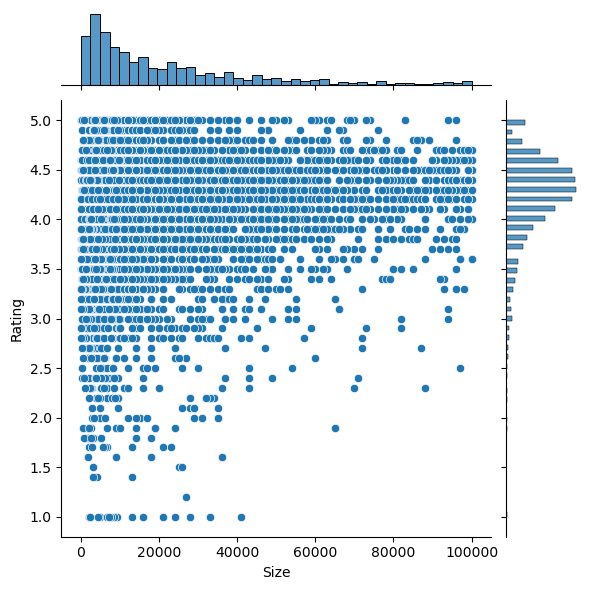

In [46]:
sns.jointplot(x='Size', y='Rating', data =inp0)

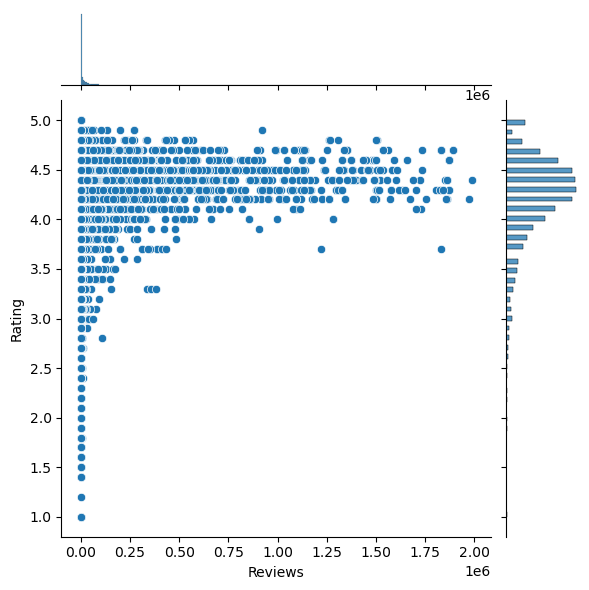

In [47]:
sns.jointplot(x='Reviews', y='Rating', data =inp0)

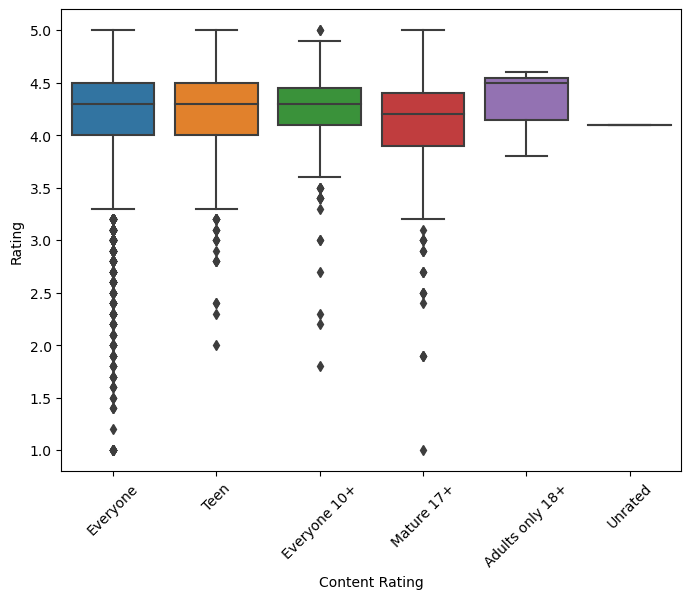

In [48]:
plt.figure(figsize=[8, 6])
sns.boxplot(x=inp0['Content Rating'], y=inp0['Rating'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

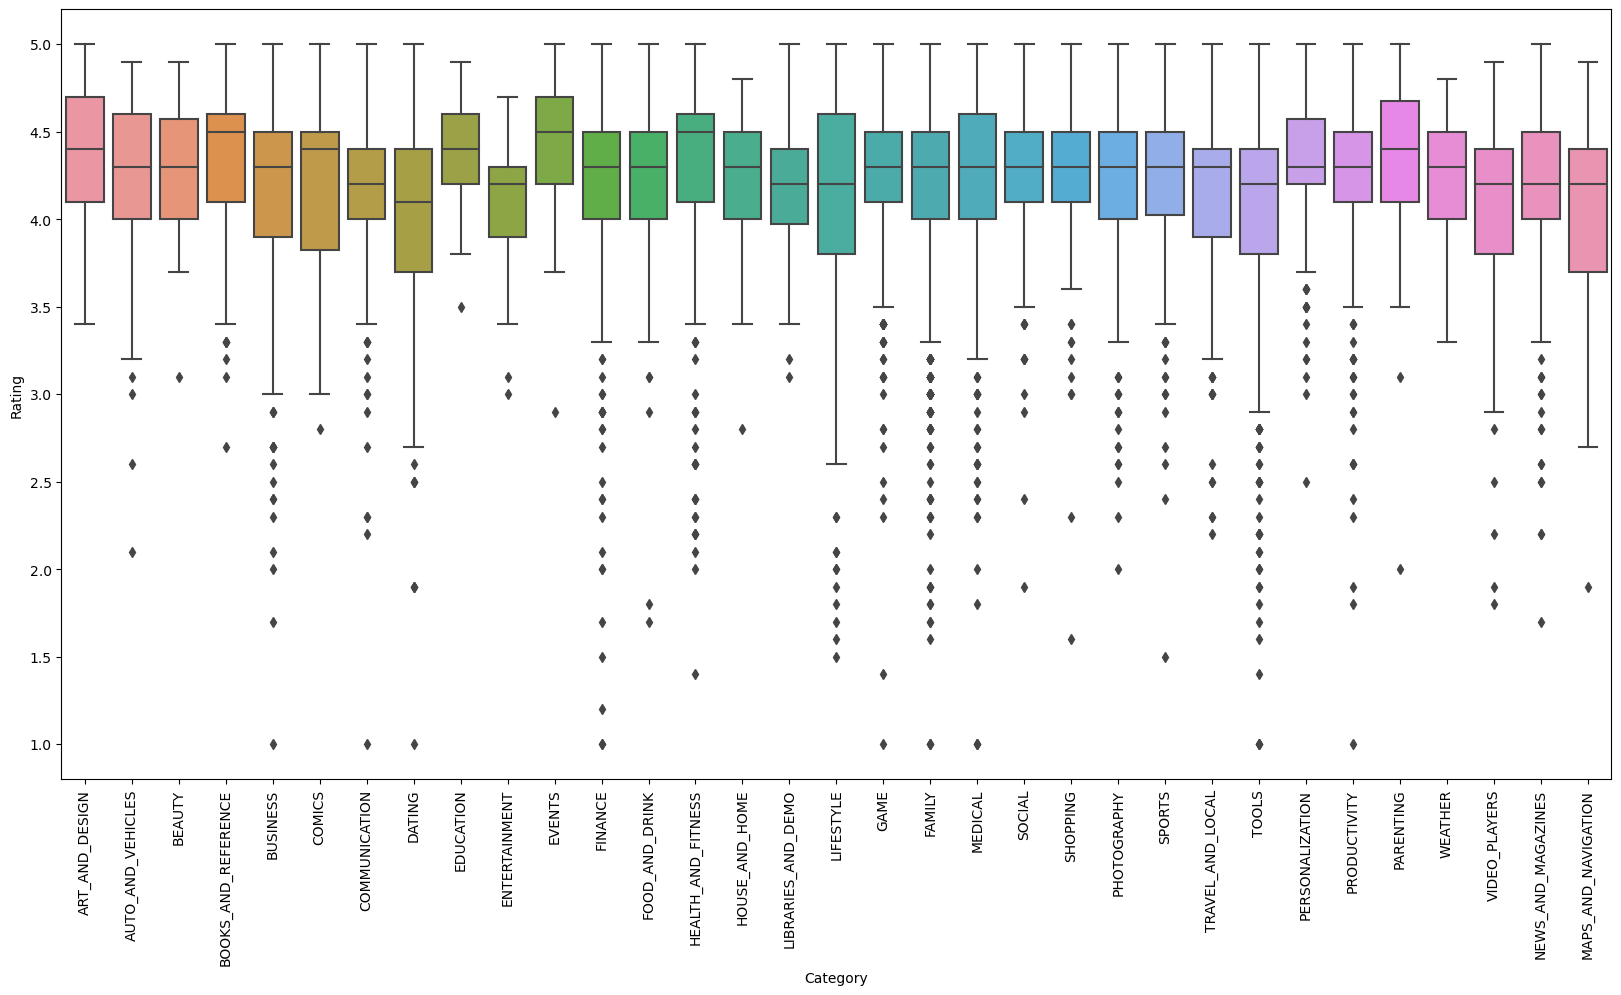

In [49]:
plt.figure(figsize=[20,10])
g= sns.boxplot(x=inp0['Category'], y=inp0['Rating'])
plt.xticks(rotation=90)
plt.show()

# Pre-Processing

In [50]:
inp1 = inp0.copy()

In [51]:
inp0.Installs.describe()

count    8.879000e+03
mean     5.595862e+06
std      2.421042e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      5.000000e+08
Name: Installs, dtype: float64

In [52]:
inp1.Installs = inp1.Installs.apply(np.log1p)

In [53]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)

In [54]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [55]:
inp1.drop(['App','Last Updated','Current Ver','Android Ver'], axis=1, inplace = True)

In [56]:
inp1.shape

(8879, 9)

In [57]:
inp2 = pd.get_dummies(inp1, drop_first=True)

In [58]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

# Determine feature and label (x&y)

In [59]:
fe = ['Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word']

In [60]:
df_train = inp2[fe]

In [61]:
df_test = inp2.Rating

In [62]:
df_test

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 8879, dtype: float64

In [63]:
df_train

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,5.075174,19000.0,9.210440,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,6.875232,14000.0,13.122365,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,11.379520,8700.0,15.424949,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,12.281389,25000.0,17.727534,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,6.875232,2800.0,11.512935,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,2.079442,2600.0,6.216606,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10836,3.663562,53000.0,8.517393,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,1.609438,3600.0,4.615121,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10839,4.744932,3600.0,6.908755,0.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


# Train Test Split

In [65]:
from sklearn.model_selection import train_test_split
train_test_split
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 0)

In [66]:
df_train.shape, df_test.shape

((6215, 157), (2664, 157))

In [67]:
df_train.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
1504,4.5,9.045702,7500.0,13.815512,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1628,4.1,8.826001,12000.0,13.122365,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8410,4.3,7.030857,48000.0,10.819798,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
838,4.5,10.664971,21000.0,13.815512,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5718,4.1,2.302585,8700.0,6.908755,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Determine feature and label(x&y)

In [68]:
y_train = df_train.pop('Rating')
x_train = df_train

In [69]:
y_test = df_test.pop('Rating')
x_test = df_test

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()

In [86]:
lr.fit(x_train, y_train)

LinearRegression()

In [88]:
y_pred= lr.predict(x_test)

In [90]:
y_pred

array([4.17153508, 4.10316633, 4.1713776 , ..., 4.33336994, 4.10821947,
       4.15414803])

In [92]:
# Evaluation on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [94]:
# Display results
print("Mean Squared Error:", mse)
print("R^2 Score on test set:", r2)

Mean Squared Error: 0.2631095572357364
R^2 Score on test set: -0.02734251098970364


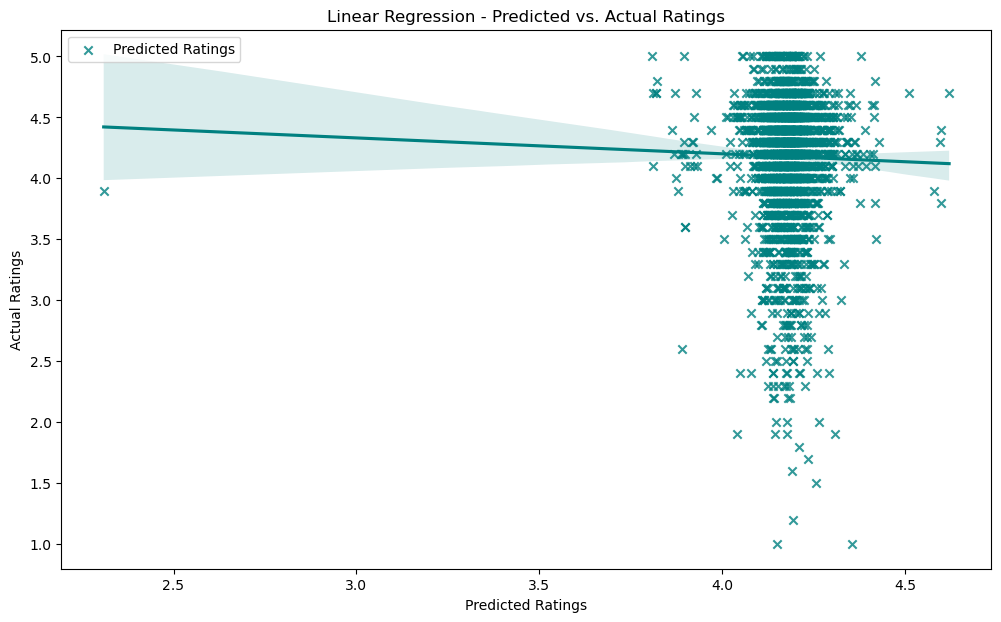

In [100]:
# Scatter plot of predicted vs. actual ratings
plt.figure(figsize=(12, 7))
sns.regplot(x=y_pred, y=y_test, color='teal', label='Predicted Ratings', marker='x')
plt.legend()
plt.title('Linear Regression - Predicted vs. Actual Ratings')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()